In [6]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# fix random seed for reproducibility
np.random.seed(7)

In [14]:
from sklearn import datasets

(moon_x,moon_y) = datasets.make_moons(n_samples=10000, noise=0.05, random_state=42)
(circle_x,circle_y) = datasets.make_circles(n_samples=10000, noise=0.025, random_state=42)

circle_x.shape, circle_y.shape


((10000, 2), (10000,))

In [35]:
# create model
model = Sequential()
model.add(Dense(7, input_dim=2, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(circle_x, circle_y, epochs=15, batch_size=10,  verbose=2)
# evaluate the model
scores = model.evaluate(circle_x, circle_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# calculate predictions
#predictions = model.predict(circle_x)

Epoch 1/15
 - 2s - loss: 0.6902 - acc: 0.5326
Epoch 2/15
 - 1s - loss: 0.6793 - acc: 0.5202
Epoch 3/15
 - 1s - loss: 0.6620 - acc: 0.6055
Epoch 4/15
 - 1s - loss: 0.6395 - acc: 0.7600
Epoch 5/15
 - 1s - loss: 0.6129 - acc: 0.8438
Epoch 6/15
 - 1s - loss: 0.5840 - acc: 0.8944
Epoch 7/15
 - 1s - loss: 0.5532 - acc: 0.9448
Epoch 8/15
 - 1s - loss: 0.5213 - acc: 0.9595
Epoch 9/15
 - 1s - loss: 0.4896 - acc: 0.9779
Epoch 10/15
 - 1s - loss: 0.4582 - acc: 0.9820
Epoch 11/15
 - 1s - loss: 0.4278 - acc: 0.9831
Epoch 12/15
 - 1s - loss: 0.3985 - acc: 0.9876
Epoch 13/15
 - 1s - loss: 0.3700 - acc: 0.9885
Epoch 14/15
 - 1s - loss: 0.3423 - acc: 0.9932
Epoch 15/15
 - 1s - loss: 0.3155 - acc: 0.9959
10000/10000 [==============================] - 0s 31us/step

acc: 99.60%


In [29]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

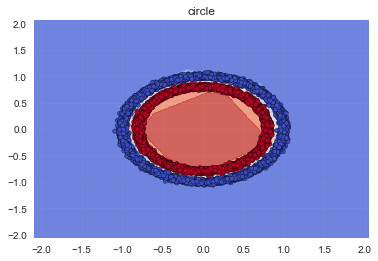

In [36]:
X0, X1 = circle_x[:, 0], circle_x[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots(1,1)

plot_contours(ax, model, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=circle_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("circle")

plt.show()

In [50]:
# create model
model2 = Sequential()
model2.add(Dense(20, input_dim=2, kernel_initializer='uniform', activation='tanh'))
model2.add(Dense(12, kernel_initializer='uniform', activation='tanh'))
model2.add(Dense(6, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model2.fit(moon_x, moon_y, epochs=20, batch_size=10,  verbose=2)
# evaluate the model
scores = model2.evaluate(moon_x, moon_y)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

# calculate predictions
#predictions = model.predict(moon_x)

Epoch 1/20
 - 2s - loss: 0.3246 - acc: 0.8558
Epoch 2/20
 - 1s - loss: 0.2469 - acc: 0.8870
Epoch 3/20
 - 1s - loss: 0.2427 - acc: 0.8891
Epoch 4/20
 - 1s - loss: 0.2410 - acc: 0.8880
Epoch 5/20
 - 1s - loss: 0.2390 - acc: 0.8871
Epoch 6/20
 - 1s - loss: 0.2362 - acc: 0.8859
Epoch 7/20
 - 1s - loss: 0.2334 - acc: 0.8834
Epoch 8/20
 - 1s - loss: 0.2312 - acc: 0.8820
Epoch 9/20
 - 1s - loss: 0.2291 - acc: 0.8807
Epoch 10/20
 - 1s - loss: 0.2273 - acc: 0.8819
Epoch 11/20
 - 1s - loss: 0.2259 - acc: 0.8823
Epoch 12/20
 - 1s - loss: 0.2251 - acc: 0.8851
Epoch 13/20
 - 1s - loss: 0.2232 - acc: 0.8830
Epoch 14/20
 - 1s - loss: 0.2212 - acc: 0.8839
Epoch 15/20
 - 1s - loss: 0.2158 - acc: 0.8867
Epoch 16/20
 - 1s - loss: 0.2042 - acc: 0.8915
Epoch 17/20
 - 1s - loss: 0.1769 - acc: 0.9090
Epoch 18/20
 - 1s - loss: 0.0806 - acc: 0.9747
Epoch 19/20
 - 1s - loss: 0.0101 - acc: 0.9993
Epoch 20/20
 - 1s - loss: 0.0032 - acc: 0.9998
10000/10000 [==============================] - 1s 52us/step

acc: 99.

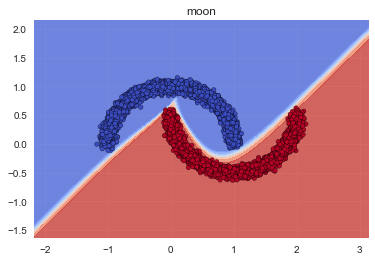

In [52]:
X0, X1 = moon_x[:, 0], moon_x[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots(1,1)

plot_contours(ax, model2, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=circle_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("moon")

plt.show()